#演示A股的指数图，均线图
修改参数:IndexCode="000300.SH"

要点：
*. PE中位数的显示
*. 


In [ ]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  #中文显示问题



In [6]:
import tushare as ts
import pandas as pd
import seaborn as sns
import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
#显示中文
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [7]:
token='f20927201ecc20e3cea9279abacfbb1d39a9624820d9b2f94613f722'

pro=ts.pro_api(token)

IndexCode="000300.SH"

In [8]:
df_daily = pro.index_daily(ts_code=IndexCode)
df_daily.head()
df_daily.tail()

,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount
3614,000300.SH,20050110,993.879,983.760,993.959,979.789,983.958,9.921,1.0083,5791697.99,3762932.890
3615,000300.SH,20050107,983.958,983.045,995.711,979.812,983.174,0.784,0.0797,7298694.09,4737469.399
3616,000300.SH,20050106,983.174,993.331,993.788,980.330,992.564,-9.390,-0.9460,6288029.05,3921015.420
3617,000300.SH,20050105,992.564,981.577,997.323,979.877,982.794,9.770,0.9941,7119108.98,4529208.214
3618,000300.SH,20050104,982.794,994.769,994.769,980.658,1000.000,-17.206,-1.7206,7412868.94,4431977.418


In [9]:
df_daily.index = pd.to_datetime(df_daily['trade_date'])
df_daily.index[:5]

DatetimeIndex(['2019-11-22', '2019-11-21', '2019-11-20', '2019-11-19',
               '2019-11-18'],
              dtype='datetime64[ns]', name='trade_date', freq=None)

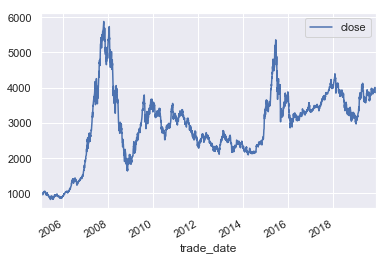

In [10]:
import seaborn as sns

# 设置为seaborn的样式，更美观
sns.set()

# 绘制收盘价曲线
df_daily.plot(y="close");

Text(0,0.5,'价格')

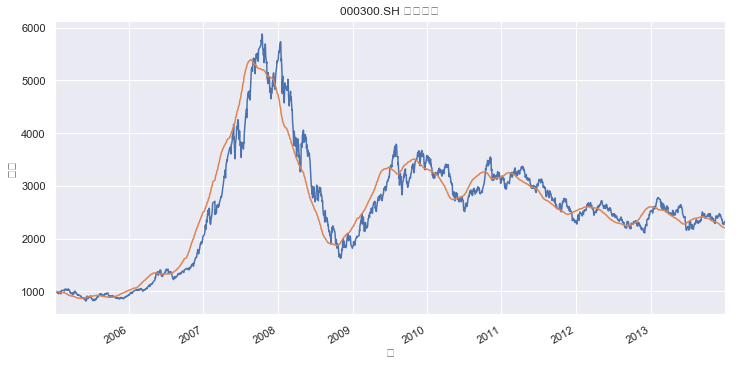

In [15]:



#df_daily = df_daily.sort_index(ascending=True)
plt.figure(figsize=(12, 6))
df_daily.close['20140101':].plot(title=IndexCode +' 价格曲线')
df_daily.close.rolling(60).mean()['20140101':].plot();
plt.xlabel('年')
plt.ylabel('价格')
# print(df_daily.close)
# print(df_daily.close.rolling(60).mean())

In [16]:
df_basic = pro.index_dailybasic(ts_code=IndexCode)
df_basic.head()

,ts_code,trade_date,total_mv,float_mv,total_share,float_share,free_share,turnover_rate,turnover_rate_f,pe,pe_ttm,pb
0,000300.SH,20191122,3.637074e+13,2.746329e+13,3.748931e+12,2.760669e+12,9.893573e+11,0.33,0.92,12.73,11.68,1.41
1,000300.SH,20191121,3.666011e+13,2.770916e+13,3.748940e+12,2.760670e+12,9.893265e+11,0.25,0.70,12.83,11.77,1.42
2,000300.SH,20191120,3.679539e+13,2.781990e+13,3.748940e+12,2.760669e+12,9.893247e+11,0.28,0.78,12.88,11.82,1.42
3,000300.SH,20191119,3.712470e+13,2.804329e+13,3.746594e+12,2.757724e+12,9.893190e+11,0.30,0.83,12.99,11.92,1.44
4,000300.SH,20191118,3.683764e+13,2.781913e+13,3.746589e+12,2.757724e+12,9.893190e+11,0.28,0.77,12.89,11.83,1.43


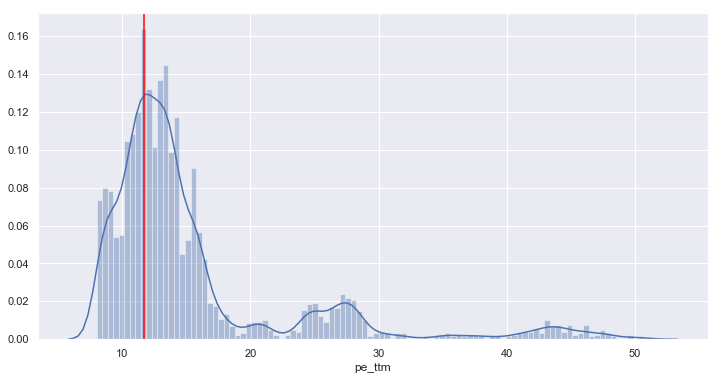

In [17]:
plt.figure(figsize=(12, 6))
sns.distplot(df_basic.pe_ttm, bins=100)
plt.axvline(x=df_basic.pe_ttm[0], color='red');

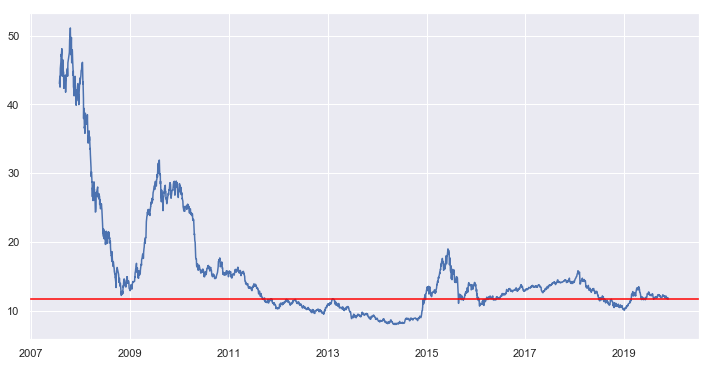

In [14]:
df_basic.index = pd.to_datetime(df_basic["trade_date"])
plt.figure(figsize=(12, 6))
plt.plot(df_basic.pe_ttm)
plt.axhline(y=df_basic.pe_ttm[0], color="red");

In [1]:
now = df_basic.pe_ttm[0]
min = df_basic.pe_ttm.min()
ratio = (now - min) / now
print("ratio: {0:.2f}%".format(ratio * 100))

NameError: name 'df_basic' is not defined